## Tematyka:
`Inżynieria cech -> "Features Engineering" z modułem Pandas`

Podobnie jak w przypadku wszystkich typów danych, inżynieria cech jest ważną częścią analizy tekstu. Może być bardzo przydatna w przypadku stosowania algorytmów `Machine Learning`.

`wymagania:`

podstawowa znajomość modułu Pandas

użyj poniższego linku do zaimportowania niezbędnych danych: 

http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [16]:

import pandas as pd
txt=pd.read_csv('/content/SMSSpamCollection', header=None, sep='\t')
txt

0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

`Nadaj nazwy kolumn`

In [18]:

txt.columns=['label', 'info']
txt.head()


label                                               info
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

`1.` Oblicz liczbę znaków w wiadomości tekstowej (`len()` każdego wiersza w kolumnie `info`). Wyświetl pierwsze 10 wartości.

In [ ]:
### BEGIN SOLUTION
# Your Solution here
### END SOLUTION

In [22]:
column=txt['info']
for row in column[:10]: 
    print(len(row)) ## pierwsze 10 wartości

111
29
155
49
61
147
77
160
157
154


Możemy sprytniej wykorzystać metodę `apply` i funkcję `lambda` w celu utworzenia nowej kolumny w ramce danych `txt`.

In [23]:
txt['info_len']=txt['info'].apply(lambda x: len(x))
txt.head()

label                                               info  info_len
0   ham  Go until jurong point, crazy.. Available only ...       111
1   ham                      Ok lar... Joking wif u oni...        29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       155
3   ham  U dun say so early hor... U c already then say...        49
4   ham  Nah I don't think he goes to usf, he lives aro...        61

Teraz możemy pogrupować dane ze względu na kolumnę `label` (grupy `spam` i `ham`), a następnie utworzyć histogramy dla tych zmiennych. 

In [32]:
ham=txt.groupby('label').get_group('ham')
spam=txt.groupby('label').get_group('spam')

Text(0.5, 1.0, 'text length')

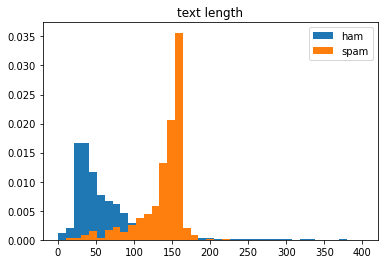

In [51]:
import numpy as np
import matplotlib.pyplot as plt
bins=np.linspace(0,400,40)
plt.hist(ham['info_len'], bins=bins, label='ham', density=True)
plt.hist(spam['info_len'], bins=bins,label='spam', density=True)
plt.legend()
plt.title("text length")


Jako kolejną cechę dla naszego tekstu możemy wybrać liczbę znaków interpuncyjnych .



`2.` Oblicz liczbę znaków interpunkcyjnych w tekście (wiersze kolumny `info`).

Możemy zacząć od definicji własnej funkcji do obliczania interpunkcji tekstu .

In [ ]:
### Your function here

In [42]:
import string
def number_punct(txt):
    sum_punct=0
    for el in txt:
    if el in string.punctuation:
        sum_punct+=1
    return sum_punct




Teraz naszą funkcję możemy zaaplikować do ramki danych `txt`:

In [43]:
txt['info_punctuation']=txt['info'].apply(lambda x: number_punct(x))
txt.head()

label  ... info_punctuation
0   ham  ...                9
1   ham  ...                6
2  spam  ...                6
3   ham  ...                6
4   ham  ...                2

[5 rows x 4 columns]

Możemy nieznacznie zmodyfikować naszą funkcję "number_punct()" w celu wyodrębnienia wartości procentowej interpunkcji w danej wiadomości tekstowej.

In [45]:
def percent_punct(txt):
    sum_punct=0
    for el in txt:
    if el in string.punctuation:
        sum_punct+=1
    return 100*sum_punct/len(txt)

In [46]:
txt['percent_punctuation']=txt['info'].apply(lambda x: percent_punct(x))
txt.head()

label  ... percent_punctuation
0   ham  ...            8.108108
1   ham  ...           20.689655
2  spam  ...            3.870968
3   ham  ...           12.244898
4   ham  ...            3.278689

[5 rows x 5 columns]

`Ćwiczenie`

Utwórz histogramy liczby znaków interpunkcyjnych dla zmiennych `spam` i `ham`.



In [ ]:
### Your solution here

Korzystając z metody `describe()` i `groupby()` z modułu `pandas`, możemy porównać statystycznie grupy ham i spam ze względu na wyodrębnione nowe funkcje.  

In [52]:
txt.groupby('label').describe()

info_len                         ... percent_punctuation                     
         count        mean        std  ...                 50%       75%        max
label                                  ...                                         
ham     4825.0   71.482487  58.440652  ...            4.575163  8.000000  85.714286
spam     747.0  138.670683  28.873603  ...            3.870968  5.423791  17.518248

[2 rows x 24 columns]